# Introduction

In [ ]:
"""
What? Drawbacks of K-means

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Import modules

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# Create synthetic dataset

In [6]:
X, y_true = make_blobs(n_samples=400, centers=4,
# flip axes for better plotting
cluster_std=0.60, random_state=0)
X = X[:, ::-1] 

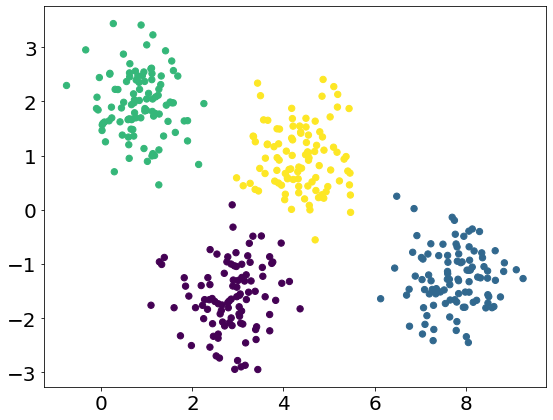

In [18]:
# Plot the data with k-means labels
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
rcParams['figure.figsize'] = 9, 7
rcParams['font.size'] = 20
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# Visualising how k-means works

In [ ]:
"""
One way to think about the k-means model is that it places a circle (or, in higher dimensions, a hyper-sphere) 
at the center of each cluster, with a RADIUS defined by the most distant point in the cluster. This radius acts 
as a hard cutoff for cluster assign‐ ment within the training set: any point outside this circle is not considered 
a member of the cluster. 
"""

In [13]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None): 
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
    for i, center in enumerate(centers)] 
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

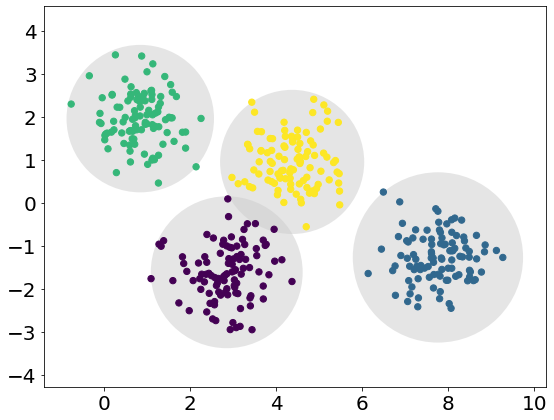

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
"""
An important observation for k-means is that these cluster models must be circular: k- means has no built-in way 
of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the 
cluster assignments end up becoming muddled as shown below.
"""

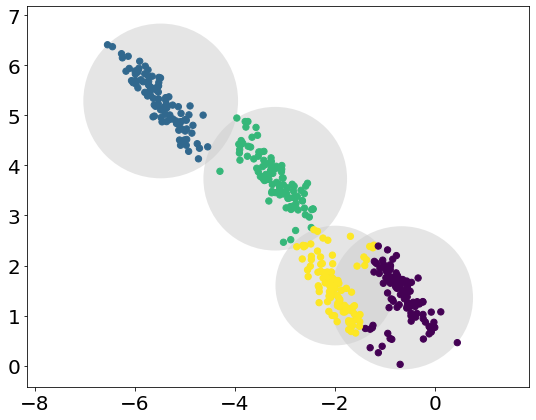

In [23]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

In [ ]:
"""
By eye, we recognize that these transformed clusters are noncircular, and thus circu‐ lar clusters would be a 
poor fit. Nevertheless, k-means is not flexible enough to account for this, and tries to force-fit the data into
four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap: see 
especially the bottom right of this plot. One might imagine addressing this particular situation by preprocessing 
the data with PCA, but in practice there is no guarantee that such a global operation will circularize the individual
data.
"""

# How can we estimate how certain the model is?

In [ ]:
"""
From an intuitive standpoint, we might expect that the clustering assignment for some points is more certain than
others; for example, there appears to be a very slight overlap between the two middle clusters, such that we might
not have complete confi‐ dence in the cluster assignment of points between them. Unfortunately, the k-means model 
has no intrinsic measure of probability or uncertainty of cluster assignments.

However, althought boostrapping is an option, it comes with his own problem.
"""